In [2]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Mengunduh dataset dari URL
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv"
df = pd.read_csv(url)
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [3]:
# Menghapus baris dengan nilai yang hilang
df.dropna(inplace=True)

# Mengubah variabel kategori menjadi numerik
df = pd.get_dummies(df, drop_first=True)

# Memisahkan fitur dan target
X = df.drop('symboling', axis=1)
y = df['symboling']

In [4]:
# Pembagian data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran set pelatihan dan pengujian
print(f"Ukuran set pelatihan: {X_train.shape[0]} baris")
print(f"Ukuran set pengujian: {X_test.shape[0]} baris")

Ukuran set pelatihan: 127 baris
Ukuran set pengujian: 32 baris


In [5]:
# Pembuatan model regresi linear
model = LinearRegression()

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Evaluasi Model
y_pred = model.predict(X_test)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 0.6676419589648623
Root Mean Squared Error (RMSE): 0.8170936047754029
R-squared: 0.5451328236992554


In [7]:
results_df = pd.DataFrame({
    'Actual Symboling': y_test,
    'Predicted Symboling': y_pred,
    'Difference': y_test - y_pred
})

# Mengatur format tabel
results_df = results_df.round(3)
results_df.reset_index(drop=True, inplace=True)

# Menampilkan tabel hasil
print(tabulate(results_df, headers="keys", tablefmt="grid"))

+----+--------------------+-----------------------+--------------+
|    |   Actual Symboling |   Predicted Symboling |   Difference |
+====+====================+=======================+==============+
|  0 |                  0 |                 0.076 |       -0.076 |
+----+--------------------+-----------------------+--------------+
|  1 |                 -1 |                -1.041 |        0.041 |
+----+--------------------+-----------------------+--------------+
|  2 |                  2 |                 1.437 |        0.563 |
+----+--------------------+-----------------------+--------------+
|  3 |                  1 |                 0.816 |        0.184 |
+----+--------------------+-----------------------+--------------+
|  4 |                  2 |                 1.798 |        0.202 |
+----+--------------------+-----------------------+--------------+
|  5 |                  0 |                -0.779 |        0.779 |
+----+--------------------+-----------------------+-----------

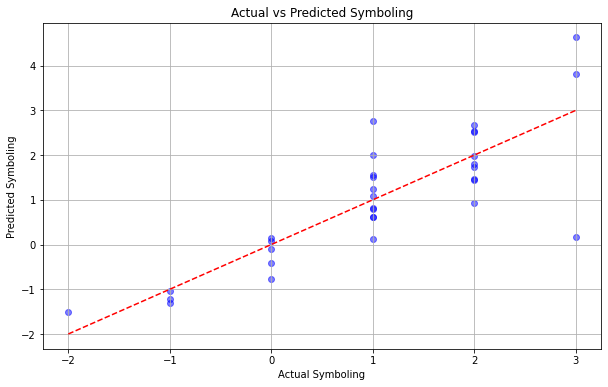

In [8]:
# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Symboling')
plt.ylabel('Predicted Symboling')
plt.title('Actual vs Predicted Symboling')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis referensi
plt.grid()
plt.show()